## Principal component analysis of reef characteristics
This notebook is devoted to a principal component analysis to see what parameters of reef environment and bleaching may be grouped, and then to see whether reefs will cluster in a way which allows useful subsets to be created.

In [1]:
%matplotlib notebook

# This code section is largely a duplicate of the data input in the
# Bleaching_Project_Data_Setup notebook, with fewer comments.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio
from mytools import principal_component as pc
# Now read our data for reef cell locations.
# A copy of the data is in this repository.  The reference copy is in
# my Coral-Model-Data repository in the ProjectionsPaper directory.
mat_data = sio.loadmat('../data/ESM2M_SSTR_JD.mat')
#print(mat_data)

try:
    cells
except NameError:
    # do nothing, it's okay not to have cells yet
    pass
else:
    # Clear the variable so we don't get carryover from earlier tests. 
    cells = cells.iloc[0:0]
# Put the lat/lon columns directly into a data frame.  Note that they are stored
# with longitude first in the incoming data. 
cells = pd.DataFrame(mat_data['ESM2M_reefs_JD'], columns=['Lon', 'Lat'])
# Put in a random variable for testing
# cells['Rand'] = np.random.uniform(low=-10, high=10, size=len(modelBleaching))

cells['abs_lat'] = abs(cells['Lat'])

# It makes more sense to have longitude have a break at 0 than at +-180, since the latter is in the midddle of a coral area.
cells['Lon'] = cells['Lon']-180*(np.sign(cells['Lon'])-1)

# Now add bleaching counts from a specific run.
bleach_data = sio.loadmat('../data/HughesCompEvents_selV_rcp60E=1OA=1.mat')
# Put the bleaching counts into a data frame.
modelBleaching = pd.DataFrame(bleach_data['events80_2016'])
modelBleaching.rename(columns={0: 'Events'}, inplace=True)
# Be we really want this in the cells dataframe
# cells['Events'] = modelBleaching['Events']

print(cells.head())

# Now get 1861-1950 SST mean and variance for each reef
sst = mat_data['SSTR_2M26_JD']
del mat_data  # this is big and not used again.
sst_mean = np.mean(sst, axis=1)
sst_var = np.var(sst, axis=1)
cells['SST'] = sst_mean
cells['variance'] = sst_var
print(cells.head())
all_names = list(cells)

     Lon        Lat    abs_lat
0  180.5 -19.145246  19.145246
1  180.5 -18.311912  18.311912
2  180.5 -17.500333  17.500333
3  180.5 -16.710136  16.710136
4  180.5 -15.940584  15.940584
     Lon        Lat    abs_lat        SST  variance
0  180.5 -19.145246  19.145246  26.051836  2.952026
1  180.5 -18.311912  18.311912  26.373503  2.654303
2  180.5 -17.500333  17.500333  26.622993  2.420091
3  180.5 -16.710136  16.710136  26.928833  2.224938
4  180.5 -15.940584  15.940584  27.229943  1.902959


<IPython.core.display.Javascript object>


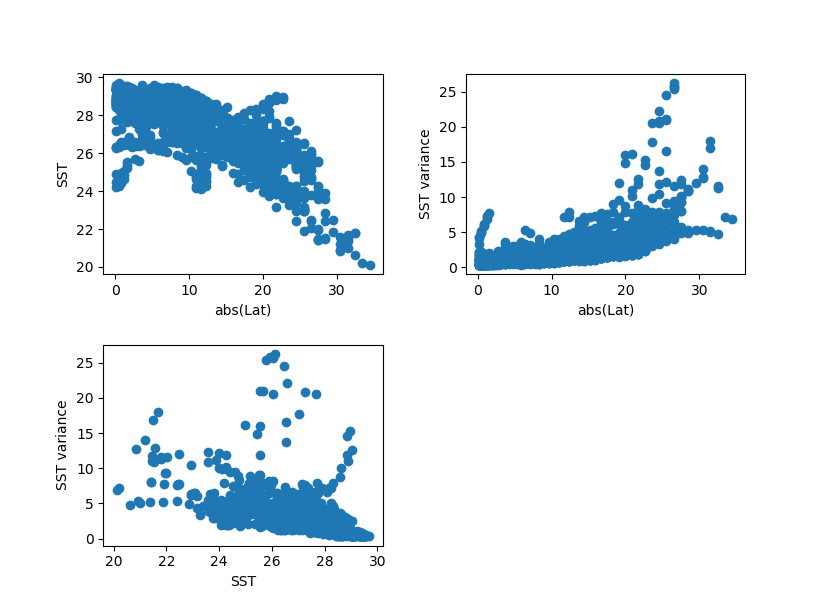

In [14]:
# Compare some variables
plt.subplot(2, 2, 1)
plt.scatter(cells['abs_lat'], cells['SST'])
plt.xlabel('abs(Lat)')
plt.ylabel('SST')
plt.subplot(2, 2, 2)
plt.scatter(cells['abs_lat'], cells['variance'])
plt.xlabel('abs(Lat)')
plt.ylabel('SST variance')
plt.subplot(2, 2, 3)
plt.scatter(cells['SST'], cells['variance'])
plt.xlabel('SST')
plt.ylabel('SST variance')
plt.subplots_adjust(hspace=0.35, wspace=0.3)
